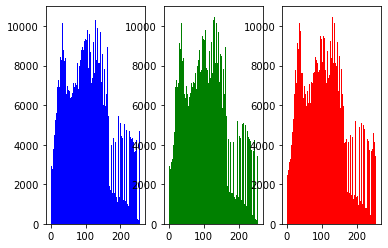

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('res.jpg',cv.IMREAD_COLOR)
plt.subplot(1, 3, 1),plt.hist(img[:,:,0].ravel(),256,[0,256], color = 'b');
plt.subplot(1, 3, 2),plt.hist(img[:,:,1].ravel(),256,[0,256], color = 'g');
plt.subplot(1, 3, 3),plt.hist(img[:,:,2].ravel(),256,[0,256], color = 'r');
plt.show()

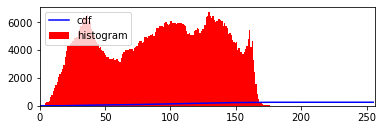

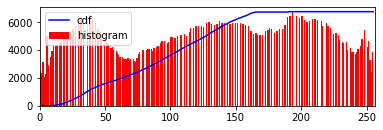

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img-low.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.subplot(2, 1, 1)
plt.plot(cdf, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cv.imshow('img1',img)
cv.imshow('img2',img2)

cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img-low.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.jpg',res)

True